In [15]:
# Stephen.Griffies@noaa.gov 

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob 

import cartopy.crs as ccrs
%matplotlib inline

In [17]:
sns.set_style('white')
sns.set_context('paper', font_scale=2)
sns.set_palette('hls', 6)
sns.set_style('ticks')

In [18]:
# static file 

fname_static = "/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc"
static       = xr.open_mfdataset(fname_static, chunks={'time': 1}, combine='by_coords')
#static       = static.assign_coords({'geolon': xmodel_h, 'geolat': ymodel_h})

areacello    = static['areacello']
wet          = static['wet']
area         = areacello*wet
areatotal    = area.sum(dim=["xh", "yh"])
weight       = area/areatotal
geolon       = static['geolon']
geolat       = static['geolat']
dxCu         = static['dxCu']
dxCv         = static['dxCv']
dxt          = static['dxt']
dyt          = static['dyt']

In [19]:
# create a grid using xgcm 

coords = {
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
}
     
metrics = {
    'X': ["dxt", "dxCu"],
    'Y': ["dyt", "dxCv"]
}

grid = Grid(static, coords=coords, metrics=metrics, periodic=['X'])

In [20]:
# datasets  

dir = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr"

files_hflso  = glob(f"{dir}/ocean_monthly.020101-020512.hflso.nc")
files_hflso += glob(f"{dir}/ocean_monthly.020601-021012.hflso.nc")
files_hflso += glob(f"{dir}/ocean_monthly.021101-021512.hflso.nc")
files_hflso += glob(f"{dir}/ocean_monthly.021601-022012.hflso.nc")
files_hflso += glob(f"{dir}/ocean_monthly.022101-022512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.022601-023012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.023101-023512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.023601-024012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.024101-024512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.024601-025012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.025101-025512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.025601-026012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.026101-026512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.026601-027012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.027101-027512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.027601-028012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.028101-028512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.028601-029012.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.029101-029512.hflso.nc")
#files_hflso += glob(f"{dir}/ocean_monthly.029601-030012.hflso.nc")
ds_hflso    = xr.open_mfdataset(files_hflso,use_cftime = True)
hflso_raw   = ds_hflso['hflso']*wet

In [21]:
files_hfsso  = glob(f"{dir}/ocean_monthly.020101-020512.hfsso.nc")
files_hfsso += glob(f"{dir}/ocean_monthly.020601-021012.hfsso.nc")
files_hfsso += glob(f"{dir}/ocean_monthly.021101-021512.hfsso.nc")
files_hfsso += glob(f"{dir}/ocean_monthly.021601-022012.hfsso.nc")
files_hfsso += glob(f"{dir}/ocean_monthly.022101-022512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.022601-023012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.023101-023512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.023601-024012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.024101-024512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.024601-025012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.025101-025512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.025601-026012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.026101-026512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.026601-027012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.027101-027512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.027601-028012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.028101-028512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.028601-029012.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.029101-029512.hfsso.nc")
#files_hfsso += glob(f"{dir}/ocean_monthly.029601-030012.hfsso.nc")
ds_hfsso    = xr.open_mfdataset(files_hfsso,use_cftime = True)
hfsso_raw   = ds_hfsso['hfsso']*wet

In [22]:
files_tos  = glob(f"{dir}/ocean_monthly.020101-020512.tos.nc")
files_tos += glob(f"{dir}/ocean_monthly.020601-021012.tos.nc")
files_tos += glob(f"{dir}/ocean_monthly.021101-021512.tos.nc")
files_tos += glob(f"{dir}/ocean_monthly.021601-022012.tos.nc")
files_tos += glob(f"{dir}/ocean_monthly.022101-022512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.022601-023012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.023101-023512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.023601-024012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.024101-024512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.024601-025012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.025101-025512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.025601-026012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.026101-026512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.026601-027012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.027101-027512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.027601-028012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.028101-028512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.028601-029012.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.029101-029512.tos.nc")
#files_tos += glob(f"{dir}/ocean_monthly.029601-030012.tos.nc")
ds_tos = xr.open_mfdataset(files_tos,use_cftime = True)
tos_raw    = ds_tos['tos']*wet 

In [23]:
# remove monthy means 

hflso_climatology = hflso_raw.groupby('time.month').mean(dim='time')
hfsso_climatology = hfsso_raw.groupby('time.month').mean(dim='time')
tos_climatology   = tos_raw.groupby('time.month').mean(dim='time')

hflso = hflso_raw.groupby('time.month') - hflso_raw.groupby('time.month').mean(dim='time')
hfsso = hfsso_raw.groupby('time.month') - hfsso_raw.groupby('time.month').mean(dim='time')
tos   = tos_raw.groupby('time.month')   - tos_raw.groupby('time.month').mean(dim='time')

/nbhome/smg/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing with an out-of-order index is generating 25 times more chunks
  return self.array[key]
/nbhome/smg/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing with an out-of-order index is generating 25 times more chunks
  return self.array[key]
/nbhome/smg/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing with an out-of-order index is generating 25 times more chunks
  return self.array[key]


In [24]:
# need dask to compute statistics 

#from dask.distributed import Client
#from dask.distributed import LocalCluster
##from dask_jobqueue import SLURMCluster

#cluster = LocalCluster(8543)
#client  = Client(cluster)
#cluster

In [25]:
# compute statistics

hfturb = hflso+hfsso

cor_tos_hflso  = xr.corr(tos, hflso,  dim='time')
cor_tos_hfsso  = xr.corr(tos, hfsso,  dim='time')
cor_tos_hfturb = xr.corr(tos, hfturb, dim='time')

cor_tos_hflso  = cor_tos_hflso.assign_coords({'geolon': geolon, 'geolat': geolat})
cor_tos_hfsso  = cor_tos_hfsso.assign_coords({'geolon': geolon, 'geolat': geolat})
cor_tos_hfturb = cor_tos_hfturb.assign_coords({'geolon': geolon, 'geolat': geolat})

cor_tos_hflso.load()
cor_tos_hfsso.load()
cor_tos_hfturb.load()

#cluster.close()
#client.close()

/nbhome/smg/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (yh: 1080, xh: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    geolon   (yh, xh) float32 -299.7 -299.5 -299.2 -299.0 ... 60.0 60.0 60.0
    geolat   (yh, xh) float32 -79.81 -79.81 -79.8 -79.8 ... 64.33 64.22 64.11

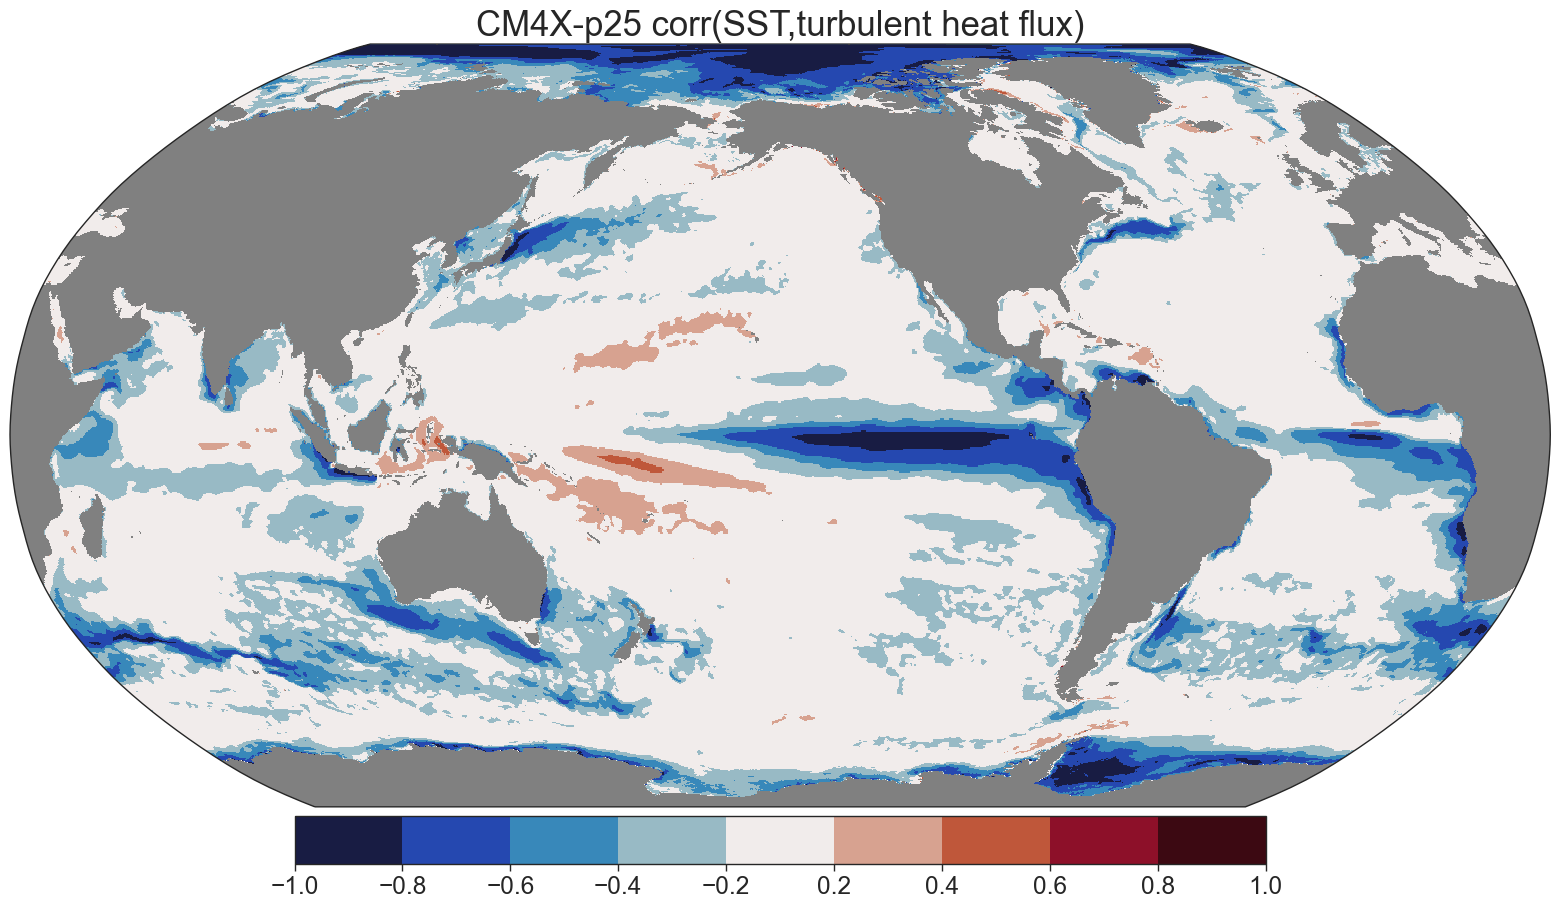

In [26]:
field = cor_tos_hfturb
vmin=-1
vmax=1
levels= [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,10),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
                     cmap=cmocean.cm.balance,
#                     cmap=cmocean.cm.diff,
                     add_colorbar=False,
                     levels=levels
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('CM4X-p25 corr(SST,turbulent heat flux)', fontsize=25)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')
#cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='none', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('CM4Xp25_corr_SST_hfturb.png', bbox_inches='tight', dpi=200)

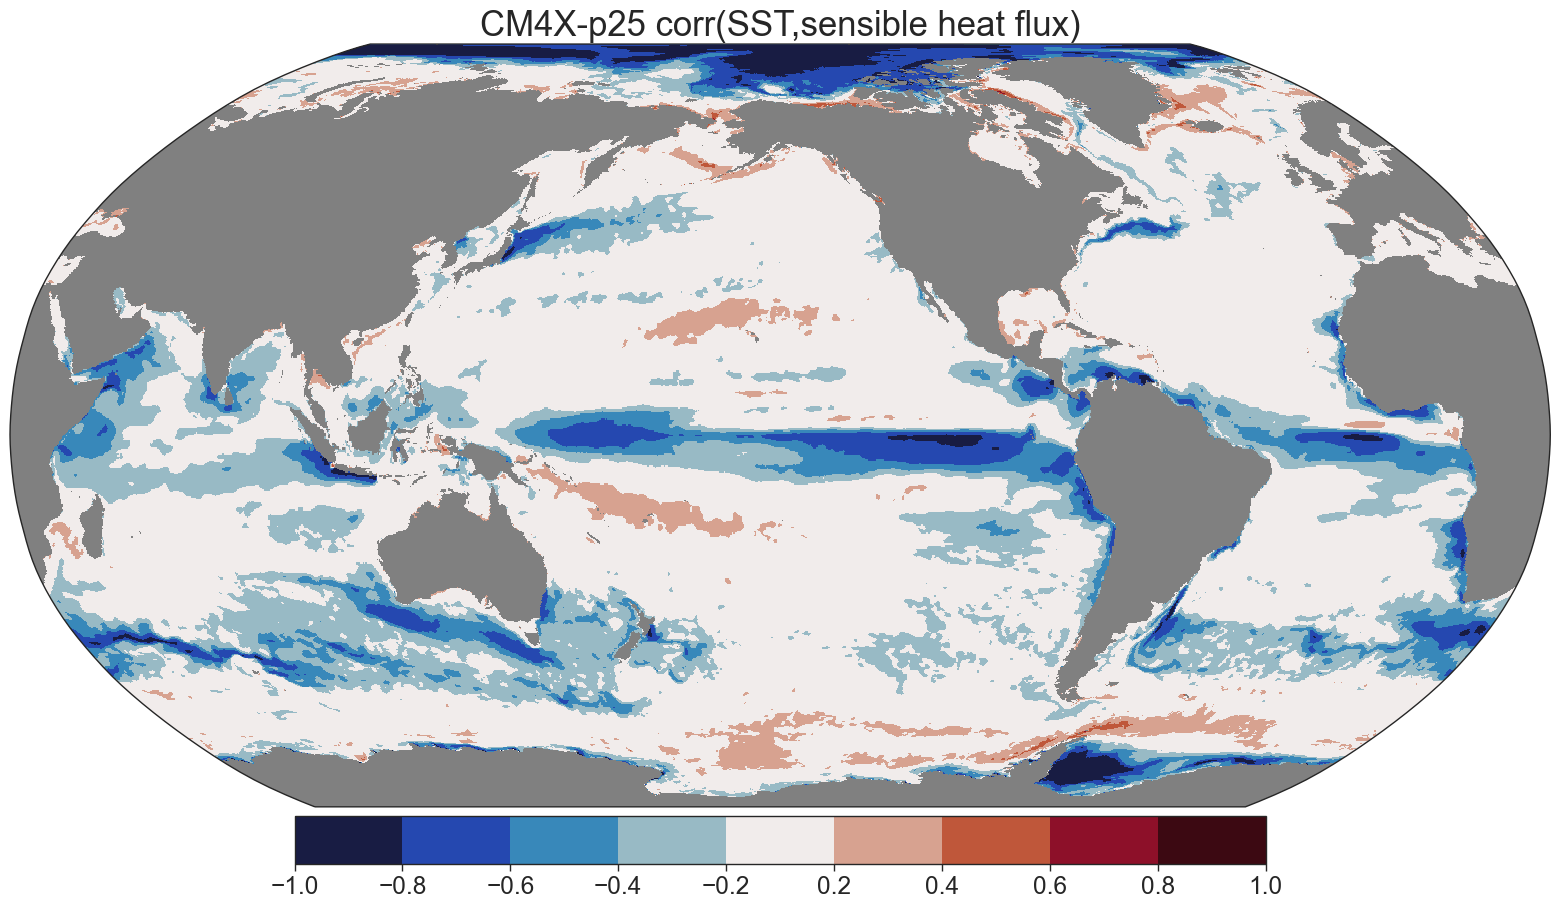

In [27]:
field = cor_tos_hfsso 
vmin=-1
vmax=1
levels= [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,10),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
                     cmap=cmocean.cm.balance,
#                     cmap=cmocean.cm.diff,
                     add_colorbar=False,
                     levels=levels
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('CM4X-p25 corr(SST,sensible heat flux)', fontsize=25)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')
#cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='none', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('CM4Xp25_corr_SST_hfsso.png', bbox_inches='tight', dpi=200)

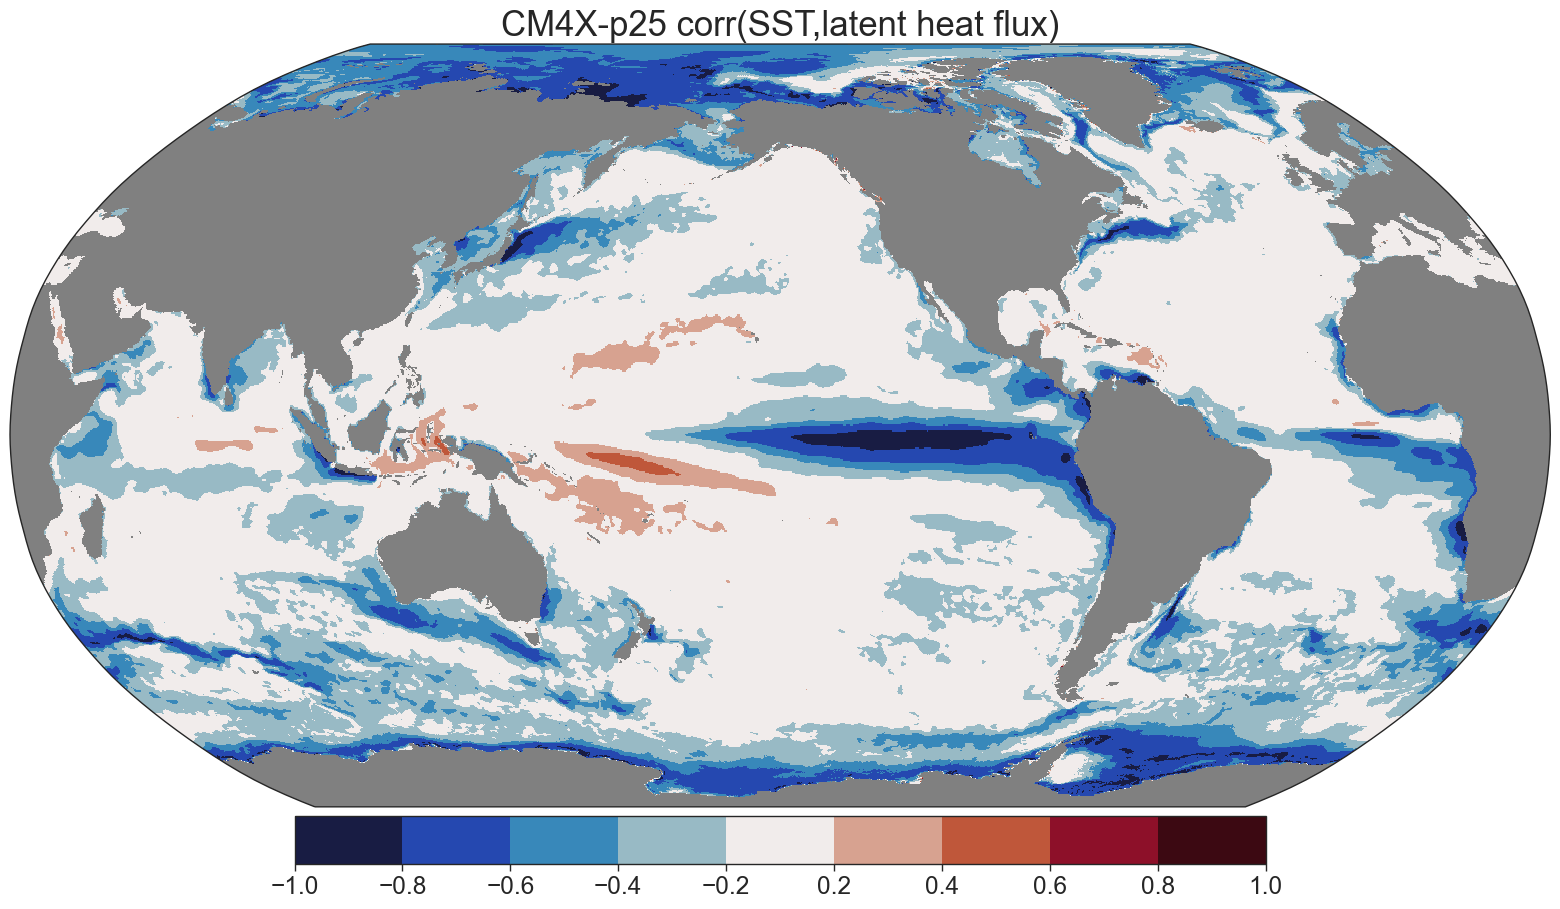

In [28]:
field = cor_tos_hflso 
vmin=-1
vmax=1
levels= [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,10),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
                     cmap=cmocean.cm.balance,
#                     cmap=cmocean.cm.diff,
                     add_colorbar=False,
                     levels=levels
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('CM4X-p25 corr(SST,latent heat flux)', fontsize=25)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')
#cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='none', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('CM4Xp25_corr_SST_hflso.png', bbox_inches='tight', dpi=200)